In [9]:
import os 
arr = os.listdir('/kaggle/input')
arr

['car-price-predictionused-cars']

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
import pandas as pd
df = pd.read_csv('/kaggle/input/car-price-predictionused-cars/car data.csv')
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [12]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (or you can fill them using data.fillna())
df.dropna(inplace=True)

# Convert categorical variables into numeric using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Define feature variables (X) and target variable (y)
X = df.drop('Selling_Price', axis=1)  # 'price' is the target column
y = df['Selling_Price']  # The target column we want to predict


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [13]:
# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate the Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr}")
print(f"Linear Regression R2 Score: {r2_lr}")


Linear Regression MSE: 1.395056024087609e+25
Linear Regression R2 Score: -6.056091274171112e+23


In [15]:
# Train a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R2 Score: {r2_rf}")


Random Forest MSE: 0.7524023742622952
Random Forest R2 Score: 0.9673373873539192


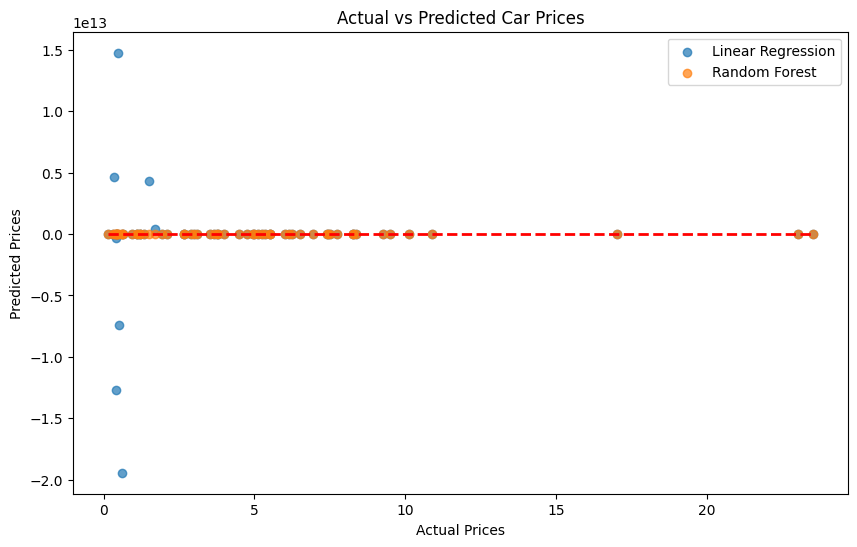

In [16]:
# Plotting the predicted vs actual prices for the test set
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_lr, label='Linear Regression', alpha=0.7)
plt.scatter(y_test, y_pred_rf, label='Random Forest', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Car Prices')
plt.legend()
plt.show()


In [17]:
# Standardizing the features (if not already done)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression again
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate the model again
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr}")
print(f"Linear Regression R2 Score: {r2_lr}")


Linear Regression MSE: 1.395056024087609e+25
Linear Regression R2 Score: -6.056091274171112e+23


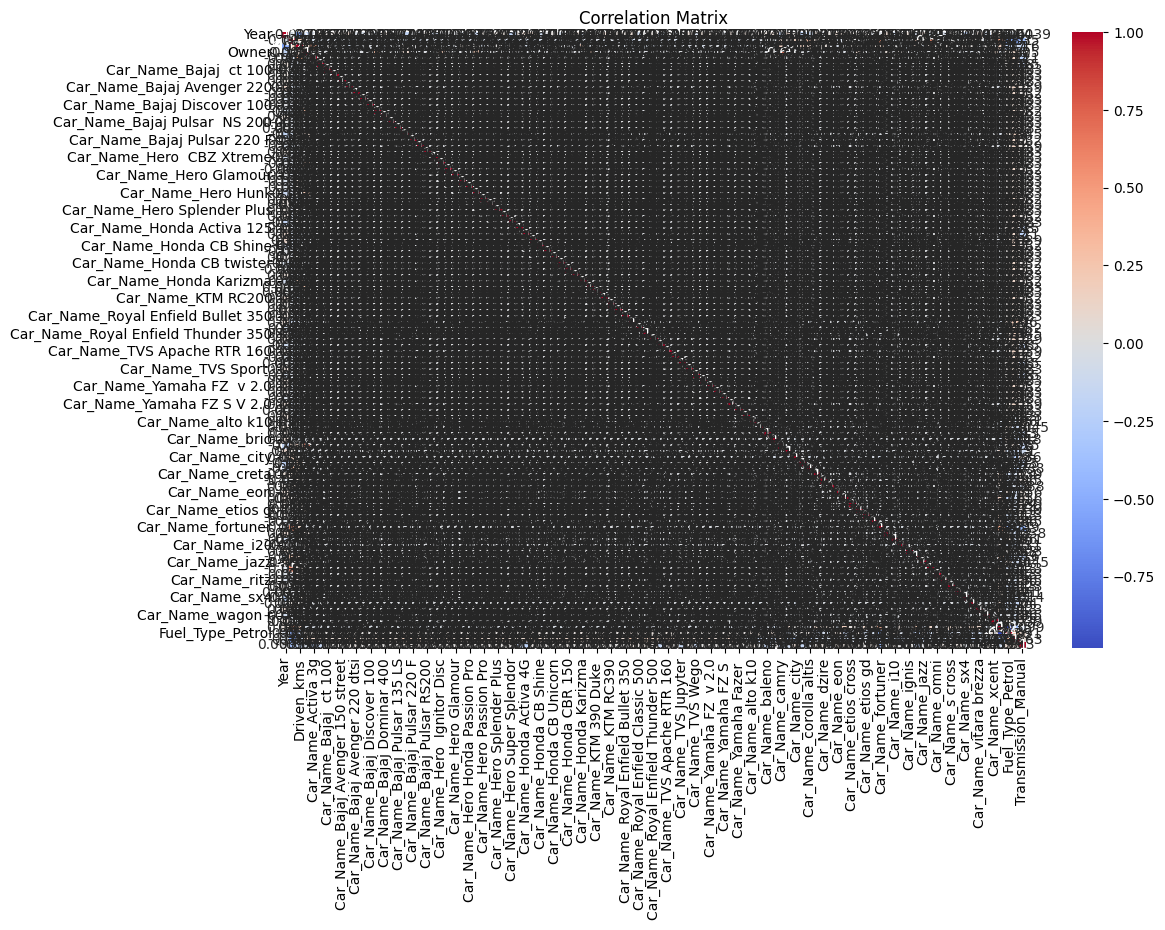

In [18]:
# Calculate correlation matrix
corr_matrix = X.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


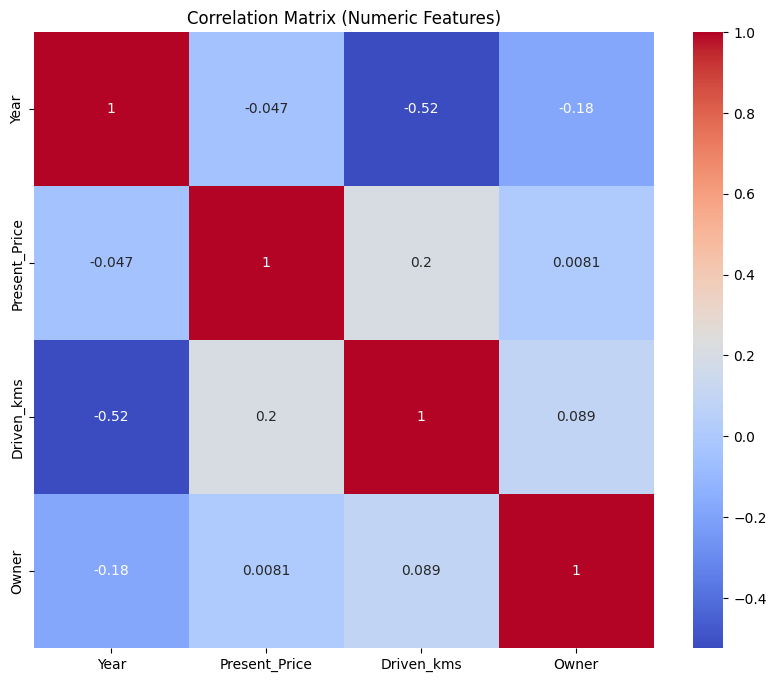

In [19]:
# Selecting only numeric columns for correlation matrix
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix for numeric columns only
corr_matrix_numeric = X[numeric_cols].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_numeric, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numeric Features)')
plt.show()


In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X[numeric_cols].columns
vif_data["VIF"] = [variance_inflation_factor(X[numeric_cols].values, i) for i in range(len(numeric_cols))]

print(vif_data)


         Feature       VIF
0           Year  2.409145
1  Present_Price  1.859173
2     Driven_kms  2.001924
3          Owner  1.038791


The Variance Inflation Factor (VIF) values you obtained are all relatively low (all under 10), which means multicollinearity is not a major issue for these features:

* Year: VIF = 2.41
* Present_Price: VIF = 1.86
* Driven_kms: VIF = 2.00
* Owner: VIF = 1.04

These values suggest that the numeric features in your dataset are not highly correlated with each other, so multicollinearity is unlikely to be the cause of the poor performance of your Linear Regression model.

In [22]:
# Check shapes of X_train and y_train
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"y_train shape: {y_train.shape}")

# Ensure the number of rows (samples) match
if X_train_scaled.shape[0] != y_train.shape[0]:
    print("Mismatch in number of rows. Check data preprocessing steps.")
else:
    # Fit Linear Regression model if everything is consistent
    lr_model = LinearRegression()
    lr_model.fit(X_train_scaled, y_train)

    # Predictions and evaluation
    y_pred_lr = lr_model.predict(X_test_scaled)
    mse_lr = mean_squared_error(y_test, y_pred_lr)
    r2_lr = r2_score(y_test, y_pred_lr)

    print(f"Linear Regression MSE: {mse_lr}")
    print(f"Linear Regression R2 Score: {r2_lr}")


X_train_scaled shape: (240, 105)
y_train shape: (240,)
Linear Regression MSE: 1.395056024087609e+25
Linear Regression R2 Score: -6.056091274171112e+23


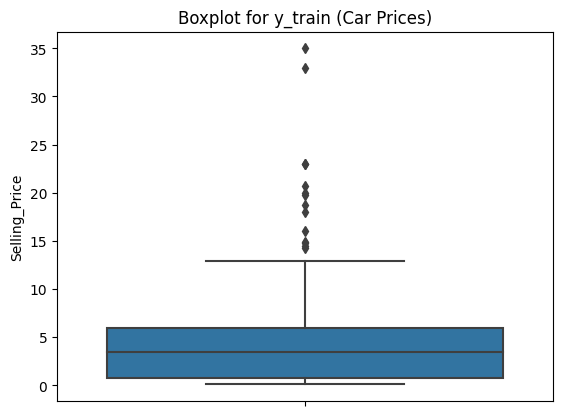

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y=y_train)
plt.title("Boxplot for y_train (Car Prices)")
plt.show()


In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # Keep 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Reduced features from {X_train_scaled.shape[1]} to {X_train_pca.shape[1]} using PCA")


Reduced features from 105 to 83 using PCA


In [25]:
from sklearn.linear_model import Ridge, Lasso

# Try Ridge Regression
ridge_model = Ridge(alpha=1.0)  # You can tune alpha value
ridge_model.fit(X_train_scaled, y_train)

y_pred_ridge = ridge_model.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression MSE: {mse_ridge}")
print(f"Ridge Regression R2 Score: {r2_ridge}")


Ridge Regression MSE: 4.478647952427209
Ridge Regression R2 Score: 0.8055769781538507


In [26]:
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameters = {'alpha': [0.1, 1.0, 10, 100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=5)
ridge_regressor.fit(X_train_scaled, y_train)

print(f"Best Alpha: {ridge_regressor.best_params_}")
print(f"Best R2 Score: {ridge_regressor.best_score_}")
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameters = {'alpha': [0.1, 1.0, 10, 100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=5)
ridge_regressor.fit(X_train_scaled, y_train)

print(f"Best Alpha: {ridge_regressor.best_params_}")
print(f"Best R2 Score: {ridge_regressor.best_score_}")


Best Alpha: {'alpha': 10}
Best R2 Score: 0.840001186304735
Best Alpha: {'alpha': 10}
Best R2 Score: 0.840001186304735


In [27]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0)
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression MSE: {mse_lasso}")
print(f"Lasso Regression R2 Score: {r2_lasso}")


Lasso Regression MSE: 7.315646644676072
Lasso Regression R2 Score: 0.6824197520044568


In [28]:
import pandas as pd
import numpy as np

feature_importances = rf_model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df.head(10))  # Top 10 important features


                    Feature  Importance
1             Present_Price    0.868146
0                      Year    0.059892
2                Driven_kms    0.031911
91    Car_Name_land cruiser    0.007772
104     Transmission_Manual    0.006167
84        Car_Name_fortuner    0.005540
101        Fuel_Type_Diesel    0.003618
72            Car_Name_city    0.003429
89          Car_Name_innova    0.002788
74   Car_Name_corolla altis    0.002463


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Selling_type   301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('/kaggle/input/car-price-predictionused-cars/car data.csv')  # Replace with your actual file name

# Display basic information about the dataset
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Encode categorical variables
le = LabelEncoder()
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])
df['Selling_type'] = le.fit_transform(df['Selling_type'])
df['Transmission'] = le.fit_transform(df['Transmission'])

# Correlation matrix for numeric columns
plt.figure(figsize=(12, 10))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numeric Features)')
plt.show()

# Save the preprocessed data
df.to_csv('preprocessed_car_data.csv', index=False)

# Display summary statistics for numeric columns
print(df[numeric_columns].describe())

# Display value counts for categorical columns
for col in categorical_columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None
              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       

NameError: name 'numeric_columns' is not defined

<Figure size 1200x1000 with 0 Axes>

In [2]:
pip install -U notebook-as-pdf

Note: you may need to restart the kernel to use updated packages.


In [3]:
pyppeteer-install

NameError: name 'pyppeteer' is not defined